In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [3]:
start= '2013-01-01'
end= date.today().strftime('%Y-%m-%d')
stock= 'GOOG'

data= yf.download(stock, start, end)

C:\Users\mayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace= True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2829,2024-04-01,151.830002,157.000000,151.649994,156.500000,156.500000,24469800
2830,2024-04-02,154.750000,155.990005,153.460007,155.869995,155.869995,17598100
2831,2024-04-03,154.919998,156.550003,154.132004,156.369995,156.369995,17266200
2832,2024-04-04,155.080002,156.179993,151.880005,151.940002,151.940002,24184800


In [6]:
ma_100_days= data.Close.rolling(100).mean()

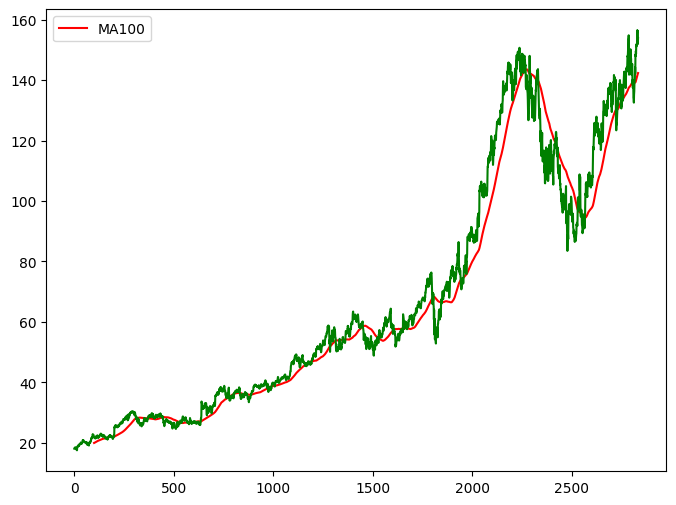

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label= 'MA100')
plt.plot(data.Close, 'g')
plt.legend()
plt.show()

In [8]:
ma_200_days= data.Close.rolling(200).mean()

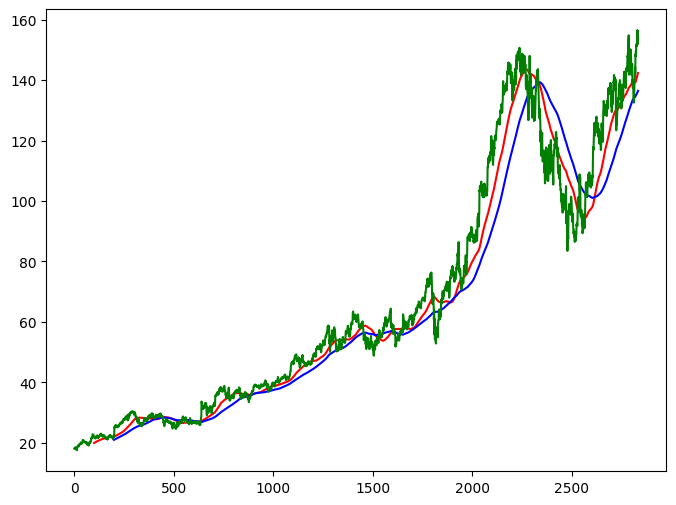

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label= 'MA100')
plt.plot(ma_200_days, 'b', label= 'MA200')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace= True)

In [11]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2267

In [13]:
data_test.shape[0]

567

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale= scaler.fit_transform(data_train)

In [16]:
x= []
y= []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x,y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model= Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True,
               input_shape= (x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [20]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [21]:
history = model.fit(x, y, epochs=100, batch_size=32, verbose=1, validation_split=0.1) 

Epoch 1/100

61/61 [==============================] - 16s 180ms/step - loss: 0.0104 - val_loss: 0.1067
Epoch 2/100
61/61 [==============================] - 9s 155ms/step - loss: 0.0023 - val_loss: 0.0145
Epoch 3/100
61/61 [==============================] - 10s 160ms/step - loss: 0.0023 - val_loss: 0.0322
Epoch 4/100
61/61 [==============================] - 10s 166ms/step - loss: 0.0022 - val_loss: 0.0288
Epoch 5/100
61/61 [==============================] - 10s 161ms/step - loss: 0.0020 - val_loss: 0.0110
Epoch 6/100
61/61 [==============================] - 10s 168ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 7/100
61/61 [==============================] - 11s 173ms/step - loss: 0.0018 - val_loss: 0.0094
Epoch 8/100
61/61 [==============================] - 11s 173ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 9/100
61/61 [==============================] - 11s 176ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 10/100
61/61 [==============================] - 11s 180ms/step - loss: 0.001

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days= data_train.tail(100)

In [24]:
data_test= pd.concat([pas_100_days, data_test], ignore_index= True)

In [25]:
data_test_scale= scaler.fit_transform(data_test)

In [26]:
x= []
y= []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [27]:
y_predict= model.predict(x)

18/18 [==============================] - 2s 56ms/step


In [28]:
scale= 1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

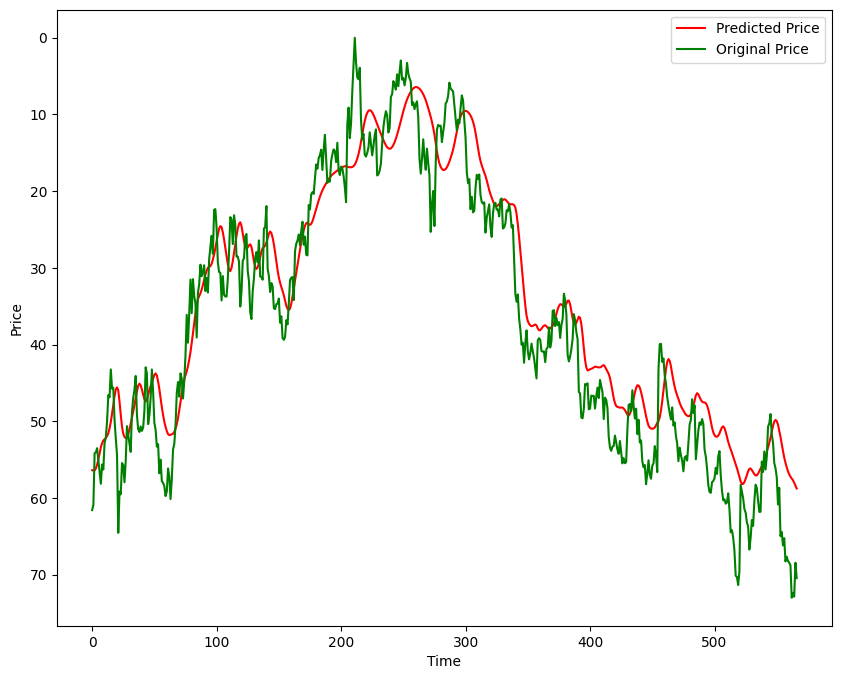

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label= 'Predicted Price')
plt.plot(y, 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')